# (Ford GoBike Analysis)
## by (Abdelrahman Fouad)

## Investigation Overview

>This presentation aims to provide insights on the influence of certain factors on the trip durations collected by Ford GoBike in February 2019.

## Dataset Overview

> The data includes data about the trips duratoin of rides and the factors that influenced it.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv('Ford_GoBike_master_file.csv')



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171422 entries, 0 to 171421
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               171422 non-null  object 
 1   end_time                 171422 non-null  object 
 2   start_station_id         171422 non-null  float64
 3   start_station_name       171422 non-null  object 
 4   start_station_latitude   171422 non-null  float64
 5   start_station_longitude  171422 non-null  float64
 6   end_station_id           171422 non-null  float64
 7   end_station_name         171422 non-null  object 
 8   end_station_latitude     171422 non-null  float64
 9   end_station_longitude    171422 non-null  float64
 10  bike_id                  171422 non-null  int64  
 11  user_type                171422 non-null  object 
 12  member_birth_year        171422 non-null  int64  
 13  member_gender            171422 non-null  object 
 14  bike

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Trip Duration for bike rides

The data is right skewed so I had to make some transformations to make it more suitable as a visual.

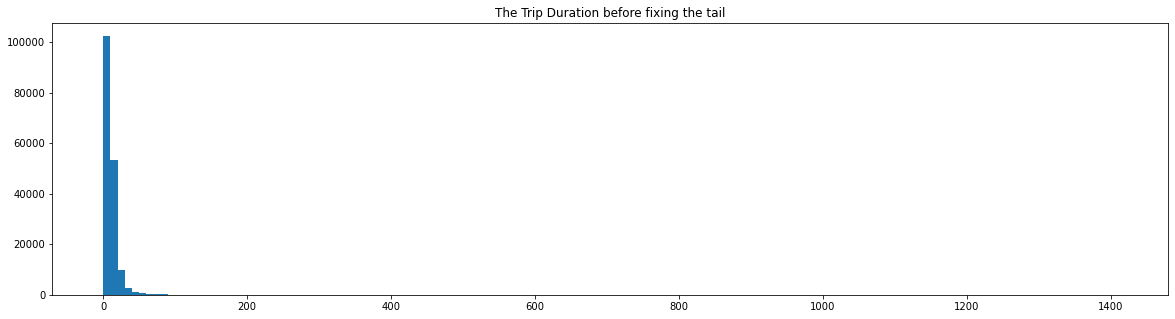

In [7]:
binsize = 10
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[20, 5])
plt.title('The Trip Duration before fixing the tail')
plt.hist(data = df, x = 'duration_min', bins=bins);

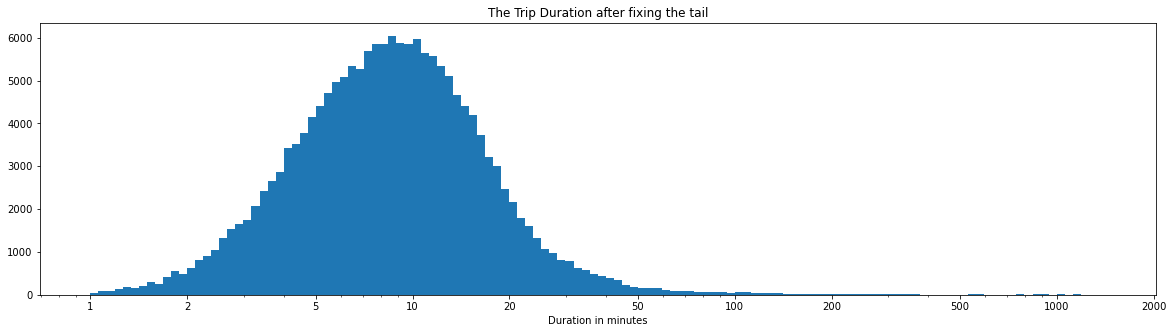

In [8]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[20, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.title('The Trip Duration after fixing the tail')
plt.xlabel('Duration in minutes');

## Trip Duration vs Age Visualization



As you see there is a slight decline in the trend as the bikers get older their duration of trips on the bike decreases with almost no biker at the age of 60 riding for more than 150 minutes

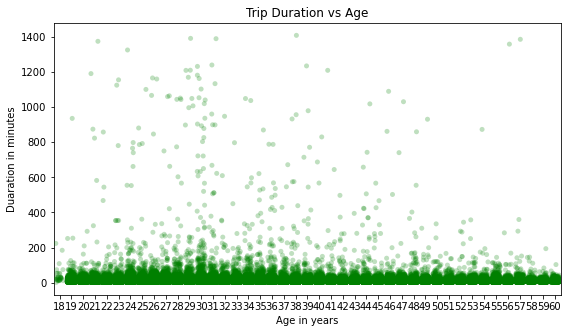

In [16]:
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1)
sb.stripplot((df['member_age']), df['duration_min'], jitter=0.35, alpha = 0.25,color='green')

plt.title('Trip Duration vs Age')
plt.xlabel('Age in years')
plt.ylabel('Duaration in minutes');


## Trip Duration vs Gender vs Age
in this part I will check the relation between the duration of the trip, the age of the bikers, and the gender of them.

for the case of gender difference, there is obvious similarity between male and female throughout the years. while the trend in others is different. for type of users same trend is seen with users ride durations declining as they get older.


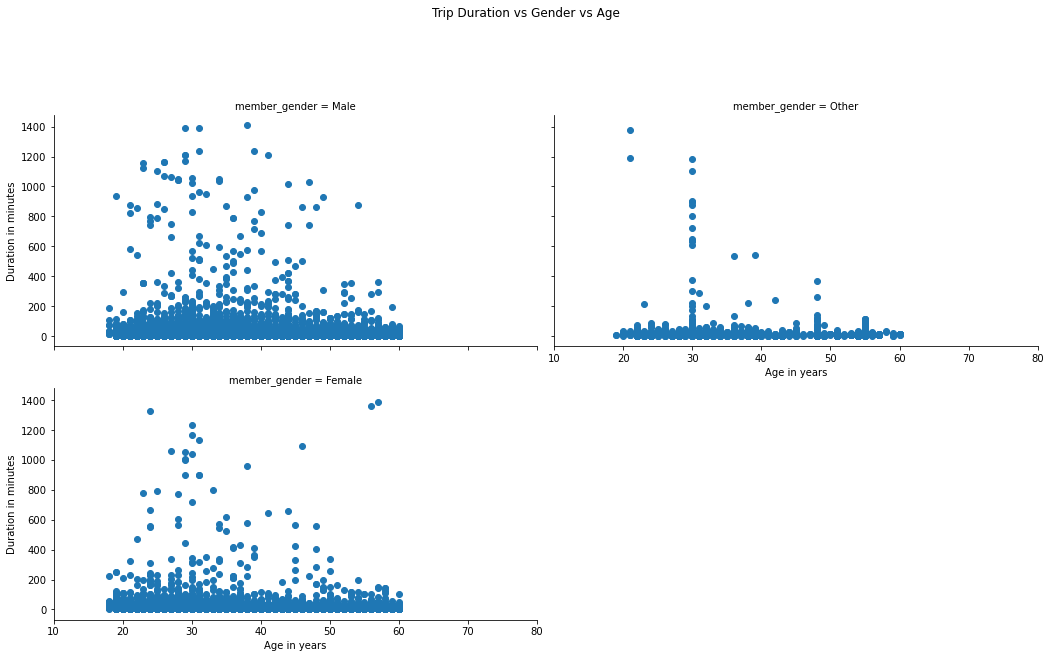

In [15]:
sep_gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height=8.27/2, aspect=(14.7/2)/(8.27/2),
                 xlim = [10, 80])
sep_gender.map(plt.scatter, 'member_age', 'duration_min', alpha= 1)


sep_gender.set_xlabels('Age in years')
sep_gender.set_ylabels('Duration in minutes')
sep_gender.fig.suptitle('Trip Duration vs Gender vs Age')
plt.suptitle("Trip Duration vs Gender vs Age", y = 1.1)
plt.tight_layout()
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [14]:
!jupyter nbconvert slidedeck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook slidedeck.ipynb to slides
[NbConvertApp] Writing 730696 bytes to slidedeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SSJin\anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SSJin\anaconda\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SSJin\anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\SSJin\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\SSJin\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\SSJin\anaconda